> **Hi there!** Have you ever thought about how people live their lives in different countries!? Maybe you want to know how much annual income do they have? Or are you planning to move somewhere else, but can't decide? First things first, you might want to check my some investigations and visualisations about it! If so, let's get started!

# Project: Investigate a Dataset (Quick overview of several countries' socio-economic indicators!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **So**, I came across an economical term, 'socio-economic development'. And I didn't know what is it. Then, I started my search on google as usual. Now, I have some idea about it. It has got several indicators and each of them has its specific meaning. Gross Domestic Product (GDP) indicates the value of products and services produced within a country in terms of money.
Gross National Income (GNI) indicates the nations overal income inside and outside of a country. And another indicator is Purchasing Power Parity (PPP). It serves to get rid of value differences of money. It tells you how item you can purchase with the money you earned in a period of time. There are several another indicators which is also important. They are Human Development Index (HDI), Life Expectancy, Employment and so on. Now, let's do some investigations on them.
>
> Well, I just wanted to compare my country's socio-economic indicators with some other countries during the near past! How much GDP does Uzbekistan have? Is it changing forward or backward? What other indicators differ? And so...

In [1]:
# Now we import some useful packages which help us on the go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **As I said above** we need several indicators to look through and certainly sereval DataFrames. We need to read .csv files, clean them and wrangle some features. It needs a lot of time and work if we just do the coding again and again. To avoid it, let's create some function which helps us loading data and checking and cleaning. It will be helpful in future. First, let's look through what we do during the procces in example of GDP data.

### General Properties

In [2]:
# first we read .csv file and assign it to a variable
# Purchasing Power Parity is adjusted so we don't need PPP data and worry about difference of money
gdp = pd.read_csv('total_gdp_ppp_inflation_adjusted.csv')
gdp.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,2.890000e+10,3.240000e+10,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
1,Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,...,2.110000e+10,2.230000e+10,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10


As you see the values of money is seen scientific form for large numbers, to avoid this we use the code below

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
gdp.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2080000000.00,2080000000.00,2080000000.00,2080000000.00,2080000000.00,2080000000.00,2080000000.00,2080000000.00,2080000000.00,...,28900000000.00,32400000000.00,33900000000.00,38500000000.00,39500000000.00,47500000000.00,51300000000.00,54900000000.00,63000000000.00,65800000000.00
1,Albania,326000000.00,327000000.00,328000000.00,330000000.00,331000000.00,332000000.00,334000000.00,335000000.00,337000000.00,...,21100000000.00,22300000000.00,23500000000.00,24900000000.00,26700000000.00,27600000000.00,28500000000.00,29300000000.00,30100000000.00,30700000000.00


Now, it looks pretty good! As we are dealing with money, the scientific form isn't look ok! So, I want to investigate my data from 2000 to 2013 period of time, see how I can extract the period from the dataframe

In [5]:
# to do this we must create a list of years beacuse there are a lot of years to write it manually
period = ['{}'.format(i) for i in range(2000, 2014)]

# we also need country names so we must insert it to the list
period.insert(0, 'country')

# now we extract the data we needed from old dataframe
gdp = gdp[period]
gdp.head(2)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,20400000000.00,18900000000.00,24100000000.00,27100000000.00,28900000000.00,32400000000.00,33900000000.00,38500000000.00,39500000000.00,47500000000.00,51300000000.00,54900000000.00,63000000000.00,65800000000.00
1,Albania,17000000000.00,18200000000.00,18800000000.00,19900000000.00,21100000000.00,22300000000.00,23500000000.00,24900000000.00,26700000000.00,27600000000.00,28500000000.00,29300000000.00,30100000000.00,30700000000.00


You can see the indexes of the new data isn't much necessary so we can drop that and index by country.

In [6]:
gdp.set_index('country', inplace = True)
gdp.head(2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,
Afghanistan,20400000000.00,18900000000.00,24100000000.00,27100000000.00,28900000000.00,32400000000.00,33900000000.00,38500000000.00,39500000000.00,47500000000.00,51300000000.00,54900000000.00,63000000000.00,65800000000.00
Albania,17000000000.00,18200000000.00,18800000000.00,19900000000.00,21100000000.00,22300000000.00,23500000000.00,24900000000.00,26700000000.00,27600000000.00,28500000000.00,29300000000.00,30100000000.00,30700000000.00


Looks pretty! Now, we can check for null values and duplicated values and can fix it if necessary.

> **Its turn to** clean our data as we wanted!

### Data Cleaning (Clean your data as you wanted!)

In [7]:
gdp.shape

(194, 14)

It looks like there are a lot of countries to compare! Let's check for null values. How much null values does it have?

In [8]:
gdp.isnull().sum().sum()

22

Mhmm! There are exist null values. But it is not necessary to fix it if Uzbekistan hasn't got any. Because there are a lot of countries to compare. So, let's check it.

In [9]:
gdp.loc['Uzbekistan'].isnull().sum()

0

Good! There are not null values! We can move on checking for duplicated values and drop them if necessary.

In [10]:
sum(gdp.duplicated())

0

That looks clean! I think it's time to do some exploratory analysis and make some visualizations. But, To do this we need another several dataframes as mentioned in introduction. We need to load them, check them and check them if necessary. Oh, no! Is there a lot of work to do, then? Don't worry. There isn't that much! Because we can create a function which helps to look through a new loading data. And It would be pretty cool!

So far we have done several tasks to get the needed data and we can integrate each step to a single function to help shortening our job during this procces. Then we can do them all at one call.

In [11]:
# This function helps us reading data and do some investigations
def fetch_me(df, start, stop):
    # this helps us scientific format of large numbers
    pd.options.display.float_format = '{:.2f}'.format
    
    # reads a DataFrame
    data = pd.read_csv(df)
    
    # extracts a DataFrame for a given period and indexes by country
    period_we_need = ['{}'.format(i) for i in range(start, stop + 1)]
    period_we_need.insert(0, 'country')
    data = data[period_we_need]
    data.set_index('country', inplace = True)
    
    # prints a quick overview about data
    print('{} edited has a shape of: '.format(df), data.shape)
    if sum(data.isnull().sum()) > 0:
        print('It has {} null values, you can check and fix it!'.format(sum(data.isnull().sum())))
        print('Uzbekistan has {} null values!'.format(data.loc['Uzbekistan'].isnull().sum()))
    if sum(data.duplicated()) > 0:
        print('It has {} duplicated values, you can drop it!'.format(sum(data.duplicated())))
    if (sum(data.isnull().sum()) == 0) and (sum(data.duplicated()) == 0):
        print('It looks clean, you can do further investigations if you want!')
    
    # returns the data we need
    return data


Now, our function is ready. Let's ask the buddy to help us!

In [12]:
gni = fetch_me('gnipercapita_ppp_current_international.csv', 2000, 2013)

gnipercapita_ppp_current_international.csv edited has a shape of:  (185, 14)
It has 31 null values, you can check and fix it!
Uzbekistan has 0 null values!


That worked fine! Let's look at the structure apperance of dataframe.

In [13]:
gni.head(2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,
Afghanistan,nan,nan,870.00,920.00,920.00,1010.00,1070.00,1210.00,1250.00,1490.00,1590.00,1680,1900.00,1940.00
Albania,4150.00,4600.00,4870.00,5250.00,5650.00,6060.00,6830.00,7490.00,8270.00,8670.00,9540.00,10200,10500.00,10800.00


That's working. Now, let's load all of the necessary files. 

In [14]:
employment = fetch_me('aged_15plus_employment_rate_percent.csv', 2000, 2013)

aged_15plus_employment_rate_percent.csv edited has a shape of:  (179, 14)
It looks clean, you can do further investigations if you want!


In [15]:
inequality = fetch_me('gini.csv', 2000, 2013)

gini.csv edited has a shape of:  (195, 14)
It has 23 duplicated values, you can drop it!


Mhmm! there are some duplicated values. Let's check and remove them.

In [16]:
inequality.duplicated()

country
Afghanistan               False
Albania                   False
Algeria                   False
Andorra                   False
Angola                    False
Antigua and Barbuda        True
Argentina                 False
Armenia                   False
Australia                 False
Austria                   False
Azerbaijan                False
Bahamas                   False
Bahrain                    True
Bangladesh                False
Barbados                  False
Belarus                   False
Belgium                   False
Belize                    False
Benin                     False
Bhutan                    False
Bolivia                   False
Bosnia and Herzegovina    False
Botswana                  False
Brazil                    False
Brunei                     True
Bulgaria                  False
Burkina Faso              False
Burundi                   False
Cambodia                  False
Cameroon                  False
                          ...  


In [17]:
inequality.drop_duplicates(inplace = True)
inequality.duplicated().sum()

0

Well, let's move on loading data!

In [18]:
hdi = fetch_me('hdi_human_development_index.csv', 2000, 2013)

hdi_human_development_index.csv edited has a shape of:  (187, 14)
It has 123 null values, you can check and fix it!
Uzbekistan has 0 null values!


In [19]:
life_expectancy = fetch_me('life_expectancy_years.csv', 2000, 2013)

life_expectancy_years.csv edited has a shape of:  (187, 14)
It looks clean, you can do further investigations if you want!


Now, we load all of our necessary data. If there is any left, we can fetch them on the go. So let's do some analysis.


<a id='eda'></a>
## Exploratory Data Analysis

> **In this part** of our project we will do some visualisations to help us easily recognize data, differences and tendencies.

### Research Question 1 (How much GDP does Uzbekistan have? Is it changing forward or backward?)

So, let's first extract the data which related to Uzbekistan.

In [20]:
# We have seen the structure of gdp DataFrame, It has got columns in year and index in country names
# let's extract data by the index of Uzbekistan
uz_gdp = gdp.loc['Uzbekistan']
uz_gdp.head()

2000   61200000000.00
2001   63600000000.00
2002   65800000000.00
2003   68200000000.00
2004   72900000000.00
Name: Uzbekistan, dtype: float64

Now, we can create a bar chart and see the data in visuals.

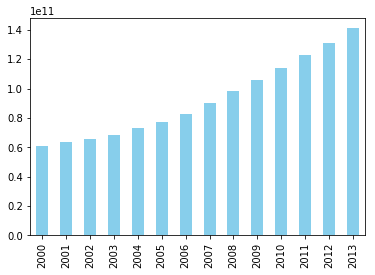

In [21]:
# to plot a bar chart
uz_gdp.plot.bar(color = 'skyblue')

You can see the visual above that, there is no indicators to show what is what. And again the old problem scintific form for money values, see how we can solve this.

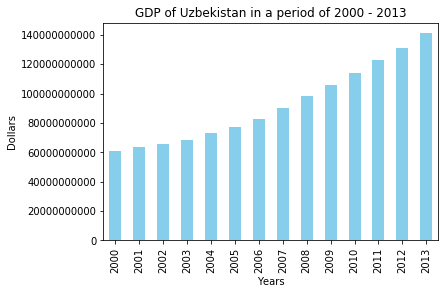

In [22]:
uz_gdp.plot.bar(color = 'skyblue')

# to put title and axis labels we can use the code below
plt.title('GDP of Uzbekistan in a period of 2000 - 2013')
plt.xlabel('Years')
plt.ylabel('Dollars')

# to avoid scientific form in plot we can use the code below
plt.ticklabel_format(style = 'plain', axis = 'y')

Now, it is more clear visial. We can find the answer for both questions here. How much GDP does Uzbekistan has? And Is it changing forward or backward? It has an average of 100 billion dollars GDP and It is changing upward.

How about making some comparisions! It would be okey? OK, let's go!

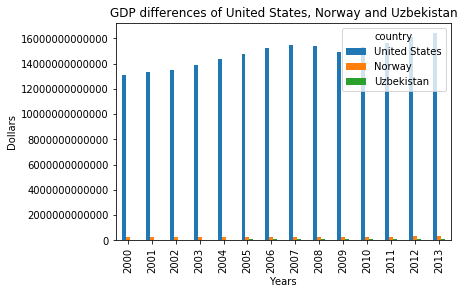

In [23]:
# First of all we need to extract several countries. We can do it by the way selecting through index
# but what about using numpy's Transpose function? It will be more convenient I think.
gdps_for_comparision = gdp.T[['United States', 'Norway', 'Uzbekistan']]

# let's draw a visual
gdps_for_comparision.plot.bar()

# you know what we use to plot more clear visual, right?
plt.title('GDP differences of United States, Norway and Uzbekistan')
plt.xlabel('Years')
plt.ylabel('Dollars')

plt.ticklabel_format(style = 'plain', axis = 'y')

Uhu! Look at the difference! USA looks like to have got a huge amount of GDP. The visual can tell us much but I want to make some other visual and different apperance. So, I don't want to write a lot of lines of code in the future and going to create some function which does comparision the way I liked! Now, let's begin.

In [24]:
# this function plots bar for comparing at most 6 countries
def plot_my_chart(title, x, y, df, country):
    # this line of code for transposing  table so that swapping places of colums and rows
    data = df.T
    
    #this is for providing different colors for bars
    list_color = ['blue', 'orange', 'lightgreen', 'purple', 'green', 'pink', 'yellow']
    l = -1
    
    # this loop plots several bar charts in one background
    for i in country:
        l += 1
        chart = data[i].plot.bar(color = '{}'.format(list_color[l]), alpha = 0.5, legend = '{}'.format(i), figsize = (12, 6))
        
        #this part names labels and title in flexible way
        if i == country[-1]:
            title = title.format(i)
        elif i == country[-2]:
            title = title.format(i) + ' and {}'
        else:
            title = title.format(i) + ', {}'
        
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        
        # and this part serves to avoid scientific forms of huge numbers 
        plt.ticklabel_format(style = 'plain', axis = 'y')
        
    return chart


Great! Nearly done. What about checking the new function with other dataframes. Consider you want to GNI per capita differences for the countries above. It can tell us each person's average annual income for people living in a country. Let's check it.

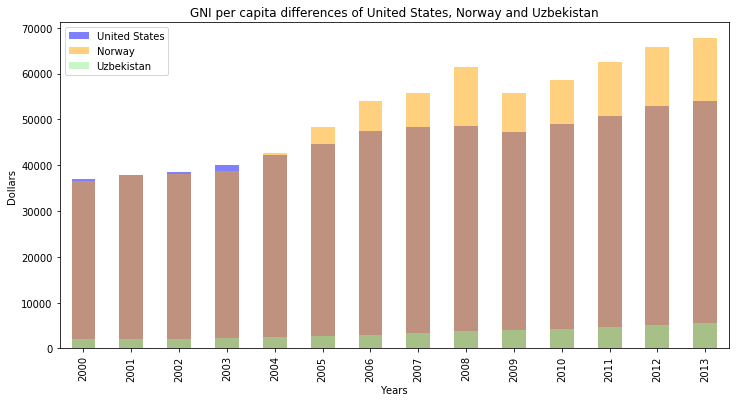

In [25]:
# we can put title and labels at once, and select a country or several countries from a dataframe with the function
plot_my_chart('GNI per capita differences of {}', 'Years', 'Dollars', gni, ['United States', 'Norway', 'Uzbekistan'])

Wow! that's geat. Look at the chart! A person living in Uzbekistan can earn on average 4 or 5 thousand dollars a year while a person living in the other two can earn up to several ten thousand dollars a year. And you can see the difference of macro and micro economic metrics. In the earlier visualisation the GDP indicator of USA is far more larger than tha other two. Aproximately, several ten times more. If we look at the GNI of USA, it is still ten times more than Uzbekistan's but nearly same as GNI of Norway. Thus, GDP itself can't tell us much. So, we must look at the other indicators more clearly understand what is going on here. Then, let's look through other indicators too.

So, It is turn to investigate the inequality indicator which is gini coefficient. It can serves to give information about how equally money is spread among the people. I think it must be economical indicator.

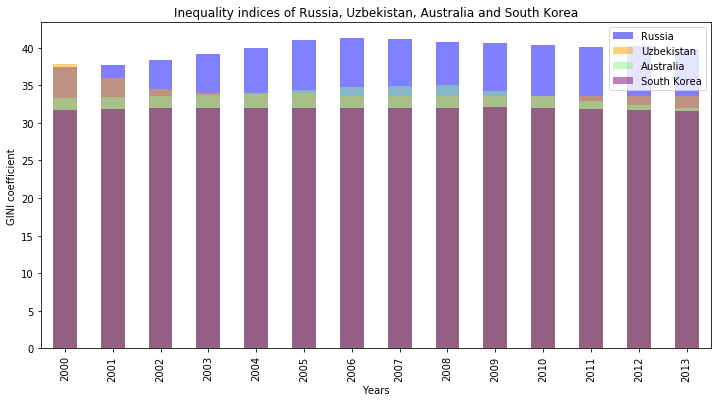

In [26]:
# I want to check it for different countries
plot_my_chart('Inequality indices of {}', 'Years', 'GINI coefficient', inequality, ['Russia', 'Uzbekistan', 'Australia', 'South Korea'])

You can see a little information about how money is spread among the people. But if we compare too many countries in one chart, it may be a little mess I think.

So, what about grouping countries with different masks and do closer insights. Let's do that!

In [27]:
# I want to make another fuction which helps to extract differen coutries from data table
# I think you have seen the function above, it is a part of plot_my_chart function
def extract_group(df, country):
    data = df.T
    return data[country]

Let's check how it works.

In [28]:
# so I want to extract a group with the mask of asia, and check for gni
asia = extract_group(gni, ['Uzbekistan', 'Tajikistan', 'South Korea', 'Japan', 'China'])

# let's check how it worked
asia.head(3)

country,Uzbekistan,Tajikistan,South Korea,Japan,China
2000,1950.00,900.00,18000.00,27200.00,2900.00
2001,2050.00,990.00,19100.00,27900.00,3180.00
2002,2150.00,1090.00,20700.00,28600.00,3520.00


It is working perfect! let's plot a line chart for them.

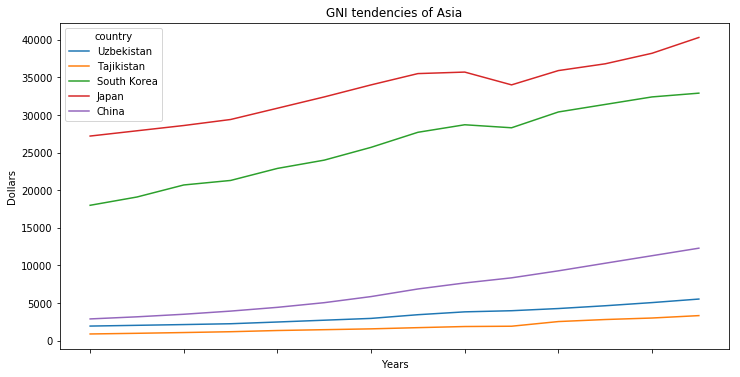

In [29]:
# to plot a line we just need to use plot itself
asia.plot(figsize = (12, 6))

plt.title('GNI tendencies of Asia')
plt.xlabel('Years')
plt.ylabel('Dollars')

plt.ticklabel_format(style = 'plain', axis = 'y')

Japan and South Korea's GNI tendencies much more faster growing upwards the the other ones.

In [30]:
# let's mask some developed countries with the name of developed
developed = extract_group(gni, ['Norway', 'United Kingdom', 'United States', 'Italy', 'Australia'])
developed.head(3)

country,Norway,United Kingdom,United States,Italy,Australia
2000,36500.00,26200.00,36900.00,26900.00,25600.00
2001,37900.00,27600.00,37900.00,27900.00,26600.00
2002,38100.00,29100.00,38600.00,28500.00,27900.00


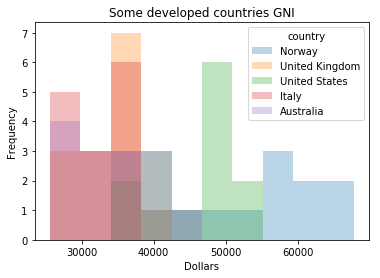

In [31]:
# for them we plot a histogram
developed.plot.hist(alpha = 0.3)

plt.title('Some developed countries GNI')
plt.xlabel('Dollars')

plt.ticklabel_format(style = 'plain', axis = 'x')

Looking at the histogram we can say United Kingdom's GNI often between 30 and 40 thousand dollars, Italy most often had 30 dollars of GNI and Norway nearly always at the top.


### Research Question 2  (What about looking at some social indicators, such as employment, HDI?!)

Text(0,0.5,'Percent (%)')

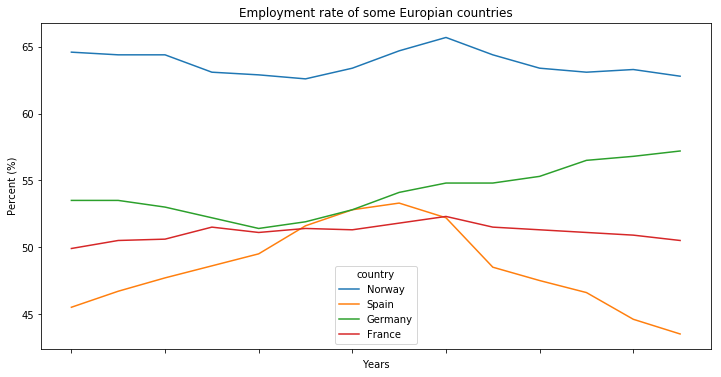

In [32]:
# so let's pick some countries from europe and plot a visual
# you can see from the visual above that Norway always have been the top of the countries, how its employment rate
europe = extract_group(employment, ['Norway', 'Spain', 'Germany', 'France'])
europe.plot(figsize = (12, 6))

plt.title('Employment rate of some Europian countries')
plt.xlabel('Years')
plt.ylabel('Percent (%)')

Norway's employment rate nearly above 60% during the period. Let's compare it with an asian country Japan.

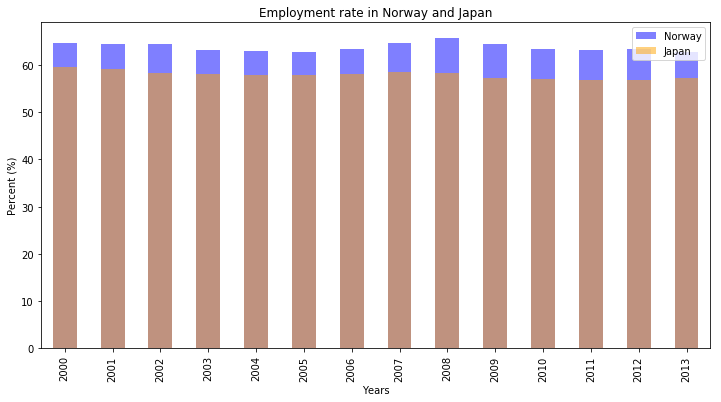

In [33]:
# let's just plot bar for each of them
plot_my_chart('Employment rate in {}', 'Years', 'Percent (%)', employment, ['Norway', 'Japan'])

I think it has been always on the top during the period. How about Human Development Index (HDI) in different countries. Oh! I'm sorry I haven't told you what does it mean? I think most of you know what is it. It includes several factors such as life expectancy, health and education. According to this factors its value calculated. Its value between 0-1, where 0 means very bad and 1 means that's perfect! So, let's dive in!

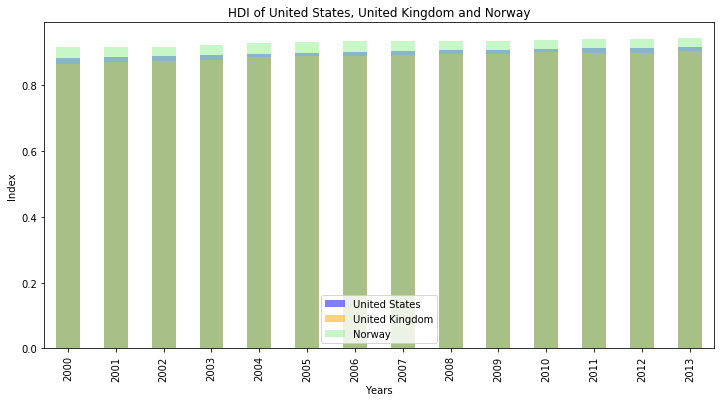

In [34]:
# what about exploring with some visuals
plot_my_chart('HDI of {}', 'Years', 'Index', hdi, ['United States', 'United Kingdom', 'Norway'])

All the selected countries have an index of greater than 0.8, because all of them developed countries. Let's look at dataset of developing countries.

Look at the the charts above, we have been customizing them with title and labels. And certainly we have been using it in most cases. What about making it a function and trying it in developing countries HDI visualisation. It will be helpful for our next vizualizations too. It helps us to improve our code's functioality. Are you agree? If yes, let's do that. Hey, guys who said 'no'! you will see it works fine.

In [35]:
def customize(title, labels):
    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

Our function is nearly ready. Let's try to use it.

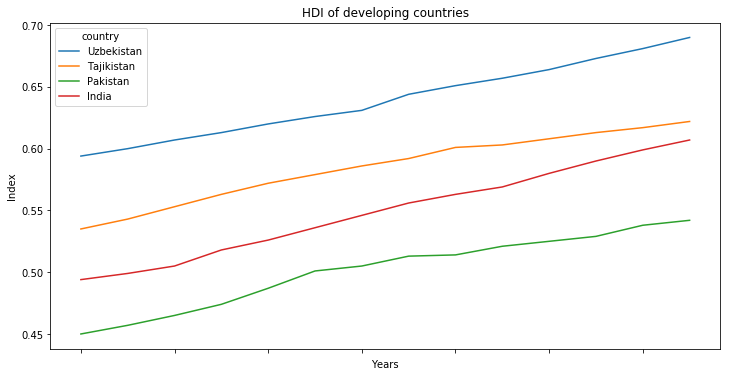

In [36]:
developing = extract_group(hdi, ['Uzbekistan', 'Tajikistan', 'Pakistan', 'India'])
developing.plot(figsize = (12, 6))

customize('HDI of developing countries', ['Years', 'Index'])

Aha! Guys I have said it works right. And it perfectly did its job. Let's back to our visualisation! What does it tell  us about developing countries. It says that their indexes has always been lower during the period. In most times Uzbekistan has an index above 0.6 while Pakistan below 0.55. What about their life expectancy? Let's plot a histogram for quick overview.

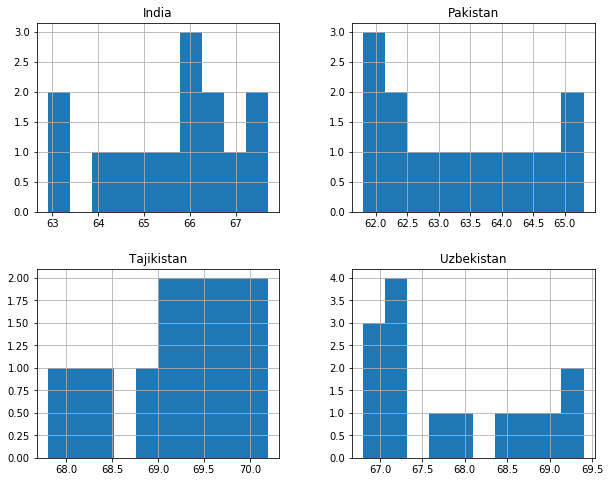

In [37]:
developing = extract_group(life_expectancy, ['Uzbekistan', 'Tajikistan', 'Pakistan', 'India'])
developing.hist(figsize = (10, 8));

From this chart you may find out some imformations like this: Life expectancy in India at most times 66 ages while Pakistan it is equal to 62 ages. And in Uzbekistan and Tajikistan it is always between 66 - 70 ages. In general, Life expectancy of this countries has always been between 60 and 70 during the period of time.

Now, I think it is time to make conclusion. I found out how economics is difficult. Have you found out any answer to your questions?! But I can't. You are great if you found any! Let me know about your findings. Let's draw some conclusions.

<a id='conclusions'></a>
## Conclusions

> **Well** This economic and social metrics has its specific meaning and one itself cannot make sense. If all of the metrics advanced in your country, your country will be a developed country. You have seen all the visuals above some countries are advanced from one side while some others are backward in most ranges. But most of the countries that we have seen above have a tendency upwards in their indicators. And I am going to state that again economics is difficult and as well as statistics. If you haven't got right records on your hand you can't make any reliable decisions. I also came across the problem during my exploration. If you have seen the analysis above, you can spot all the investigations based on an old data. I was going to explore the data for current situation but there are not full records for my selected metrics. I mean I was going to compare my countries socio-economic metrics with others but on my country's records, there is only a limited period which has full records for my selections. And I thought it can't be fillable with some methods like mean value for all countries because they were economic and social indicators. Filling them with some other values may lead to us wrong conclusions. So, I had to pick up a period of time and start my investigation.  